In [ ]:
import os
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
# Cargar test data
df = pd.read_csv("../../data/processed/SPLV_clean.csv", parse_dates=["Date"])
test_df = df[df['Date'] >= '2025-03-01']
X_test = test_df.drop(columns=['target', 'Close', 'Open', 'High', 'Low', 'Date'])
y_test = test_df['target']

# Cargar modelos guardados
model_names = ["DecisionTree", "RandomForest", "AdaBoost", "GradientBoosting", "LightGBM", "XGBoost"]
models = {}

for name in model_names:
    path = f"../../models/modeloSPLV_{name}.pkl"
    if os.path.exists(path):
        models[name] = joblib.load(path)
    else:
        print(f"❌ Modelo no encontrado: {name}")

In [4]:
# Crear tabla de resumen
summary = []

for model_name, model in models.items():
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    summary.append({
        "Model": model_name,
        "Accuracy": round(acc, 4),
        "Precision (Macro)": round(prec, 4),
        "Recall (Macro)": round(rec, 4),
        "F1-score (Macro)": round(f1, 4)
    })

df_summary = pd.DataFrame(summary)
print("\n📊 Métricas globales comparadas por modelo:")
print(df_summary.sort_values(by="Accuracy", ascending=False))



📊 Métricas globales comparadas por modelo:
              Model  Accuracy  Precision (Macro)  Recall (Macro)  \
5           XGBoost    0.6429             0.6533          0.5615   
2          AdaBoost    0.6071             0.5625          0.5321   
3  GradientBoosting    0.6071             0.5625          0.5321   
0      DecisionTree    0.5714             0.2963          0.4706   
1      RandomForest    0.5714             0.5043          0.5027   
4          LightGBM    0.4643             0.5125          0.5107   

   F1-score (Macro)  
5            0.5238  
2            0.4992  
3            0.4992  
0            0.3636  
1            0.4750  
4            0.4581  


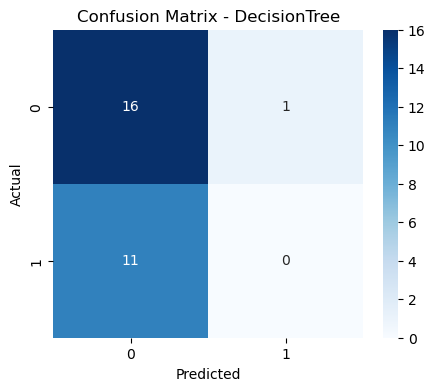

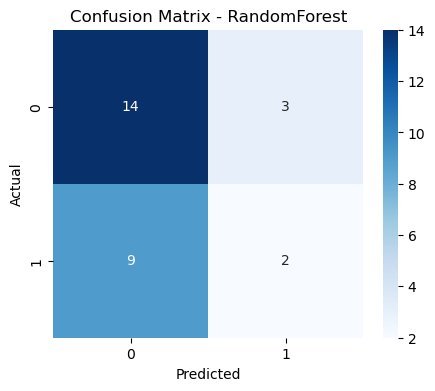

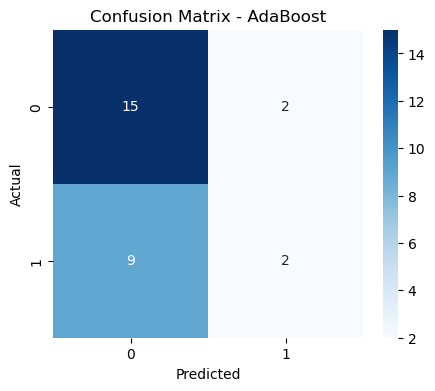

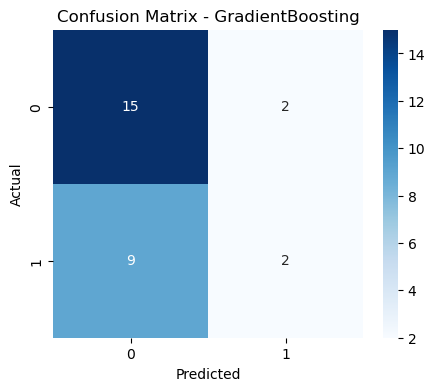

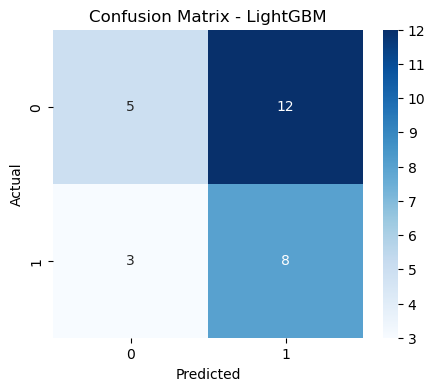

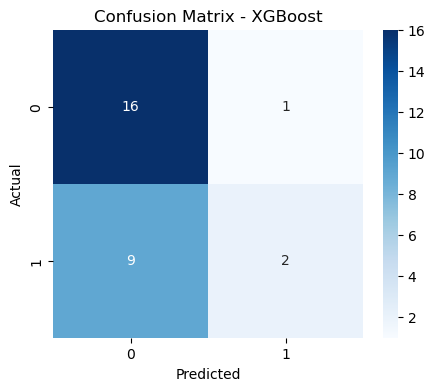

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


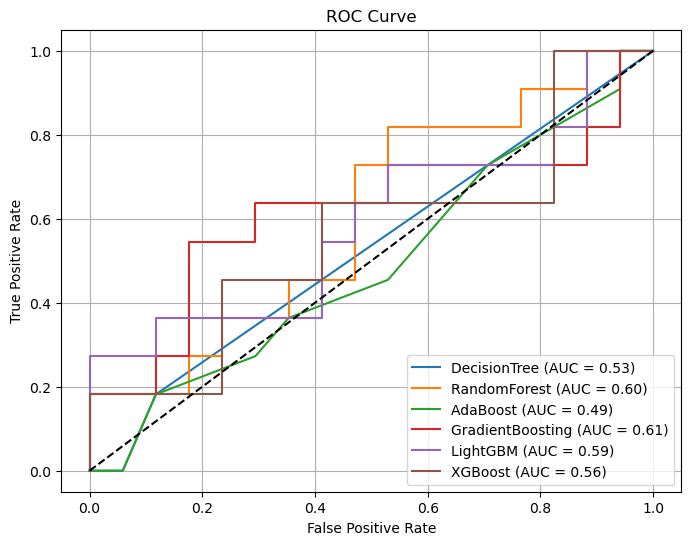

In [6]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
